# TELECOM CHURN MODEL

For Telecom companies it is key to attract new customers and at the same time avoid contract terminations (=churn) to grow their revenue generating base. Looking at churn, different reasons trigger customers to terminate their contracts, for example better price offers, more interesting packages, bad service experiences or change of customers’ personal situations.
The key challenge is to predict if an individual customer will churn or not. To accomplish that, machine learning models are trained based on 70% of the sample data. The remaining 30% are used to apply the test models and assess their predictive power with regards to “churn / not churn”.

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### CHECKING DATA

The data set for this classification problem is taken from Kaggle.
(https://www.kaggle.com/blastchar/telco-customer-churn)

In [2]:
telecom=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
telecom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
telecom.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

**SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer.**

**75% customers have tenure less than 55 months.**

**Average Monthly charges are USD 64.76 whereas 75% customers pay more than USD 89.85 per month and maximum Monthly Charges is 118.75 USD.**

In [6]:
telecom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
telecom.shape

(7043, 21)

# EXPLORATORY DATA ANALYSIS

<Figure size 4800x3000 with 0 Axes>

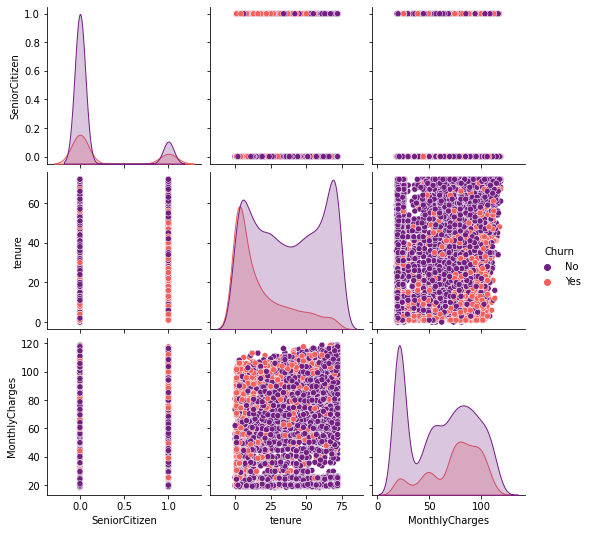

In [8]:
plt.figure(dpi=300, figsize=(16,10))
sns.pairplot(telecom,hue="Churn",palette="magma")

**Churn is high when Monthly Charges are high.**

**Churn is high at starting tenure and churn is low as tenure increases.**

**Senior Citizens has low churn.**


<AxesSubplot:xlabel='Churn', ylabel='count'>

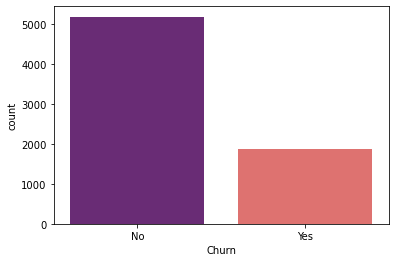

In [9]:
sns.countplot(x='Churn',data=telecom,palette='magma')

**The churn data is imbalanced, it shows a high No-churn.**

<AxesSubplot:xlabel='Churn', ylabel='count'>

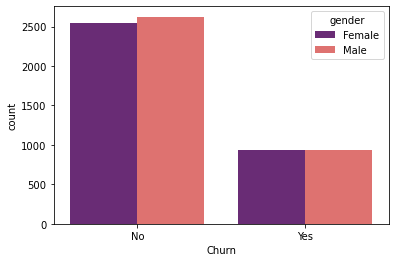

In [10]:
sns.countplot(x='Churn',data=telecom,hue="gender",palette='magma')

**Churn in male and female is approximately same whereas in the No-churn male are more than female.**

<AxesSubplot:xlabel='Dependents', ylabel='count'>

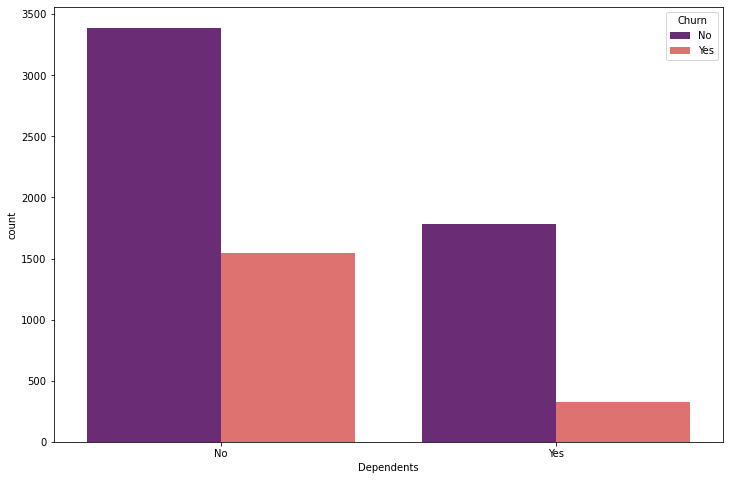

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x="Dependents",hue="Churn",palette="magma",data=telecom)

**People which are not dependent on other has high churn.**

<AxesSubplot:xlabel='Partner', ylabel='count'>

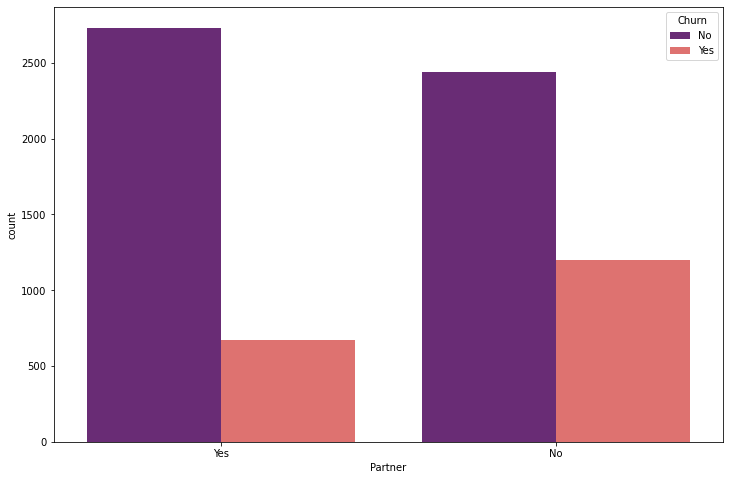

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x="Partner",hue="Churn",palette="magma",data=telecom)

**People have partners have less churn.**

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

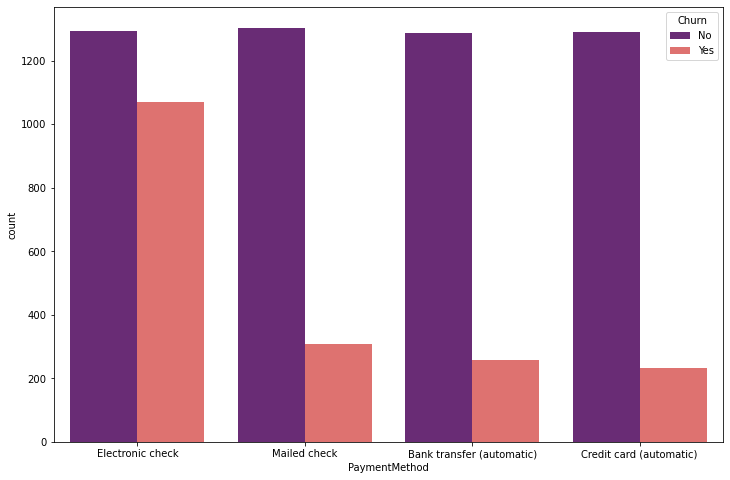

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x="PaymentMethod",hue="Churn",palette="magma",data=telecom)

**Churn is high in Electronic check medium for payment.**

<AxesSubplot:xlabel='Contract', ylabel='count'>

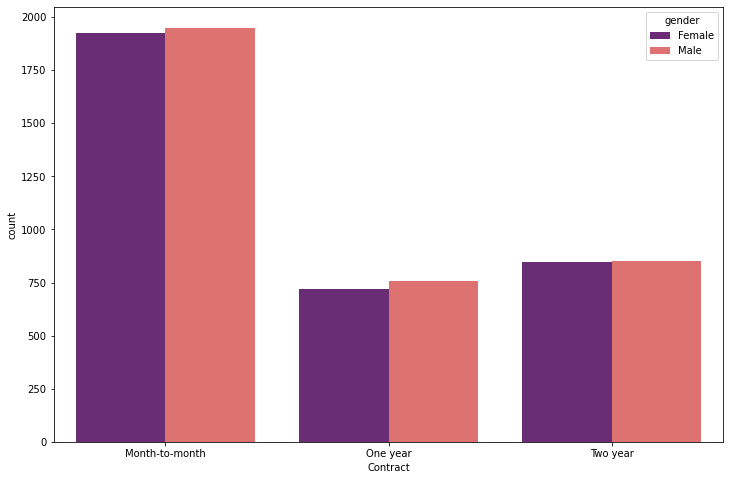

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x="Contract",hue="gender",palette="magma",data=telecom)

**People prefer Month to month contract instead of one year and two year contract.**

<AxesSubplot:xlabel='Contract', ylabel='count'>

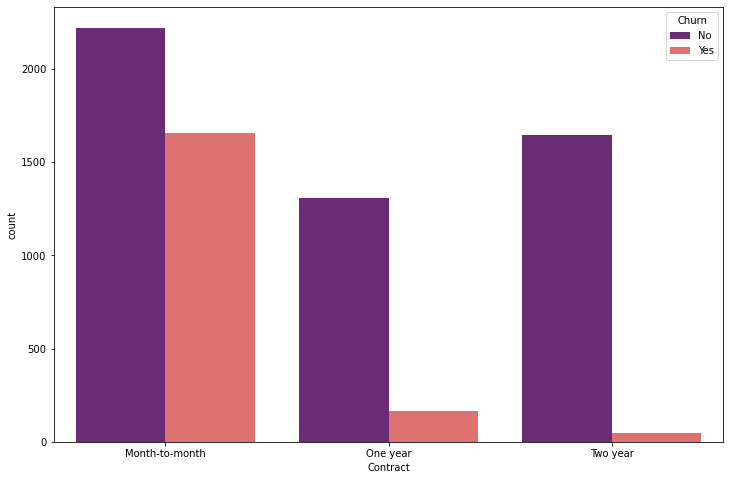

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x="Contract",hue="Churn",palette="magma",data=telecom)

**Month to month contract has high churn.**

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

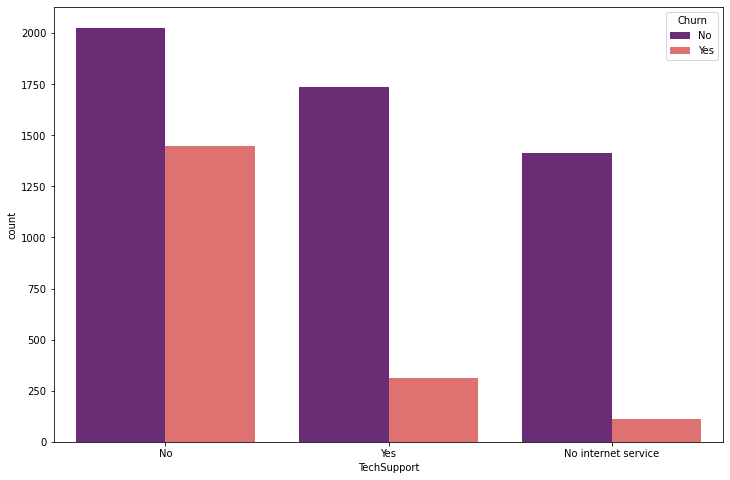

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x="TechSupport",hue="Churn",palette="magma",data=telecom)

** No Tech Support category are high churners and No internet service has low churn.**

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

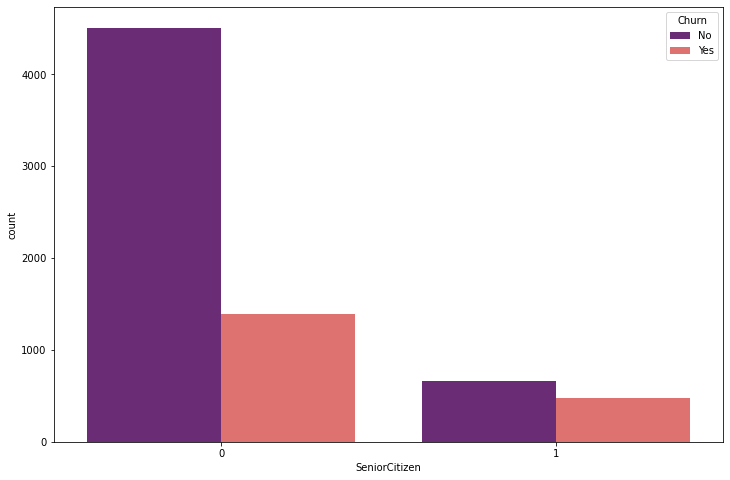

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x="SeniorCitizen",hue="Churn",palette="magma",data=telecom)

**Non-Senior citizens are high churner.** 

<AxesSubplot:xlabel='InternetService', ylabel='count'>

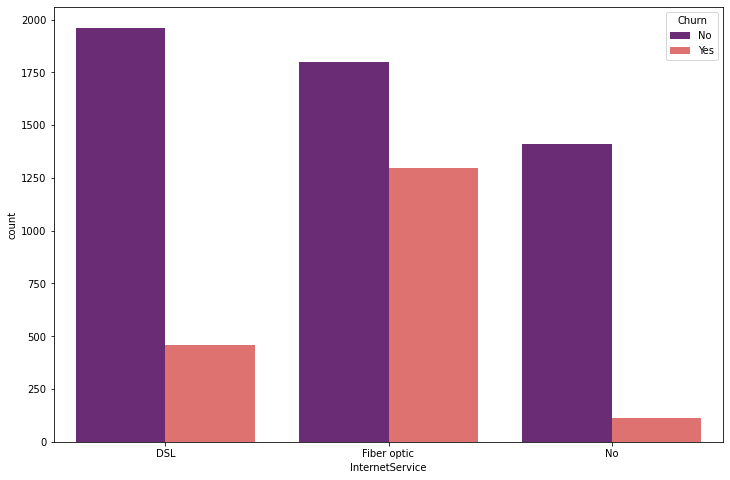

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x="InternetService",hue="Churn",palette="magma",data=telecom)

**Fiber optic has high churn and No-internet service has very less churn.**

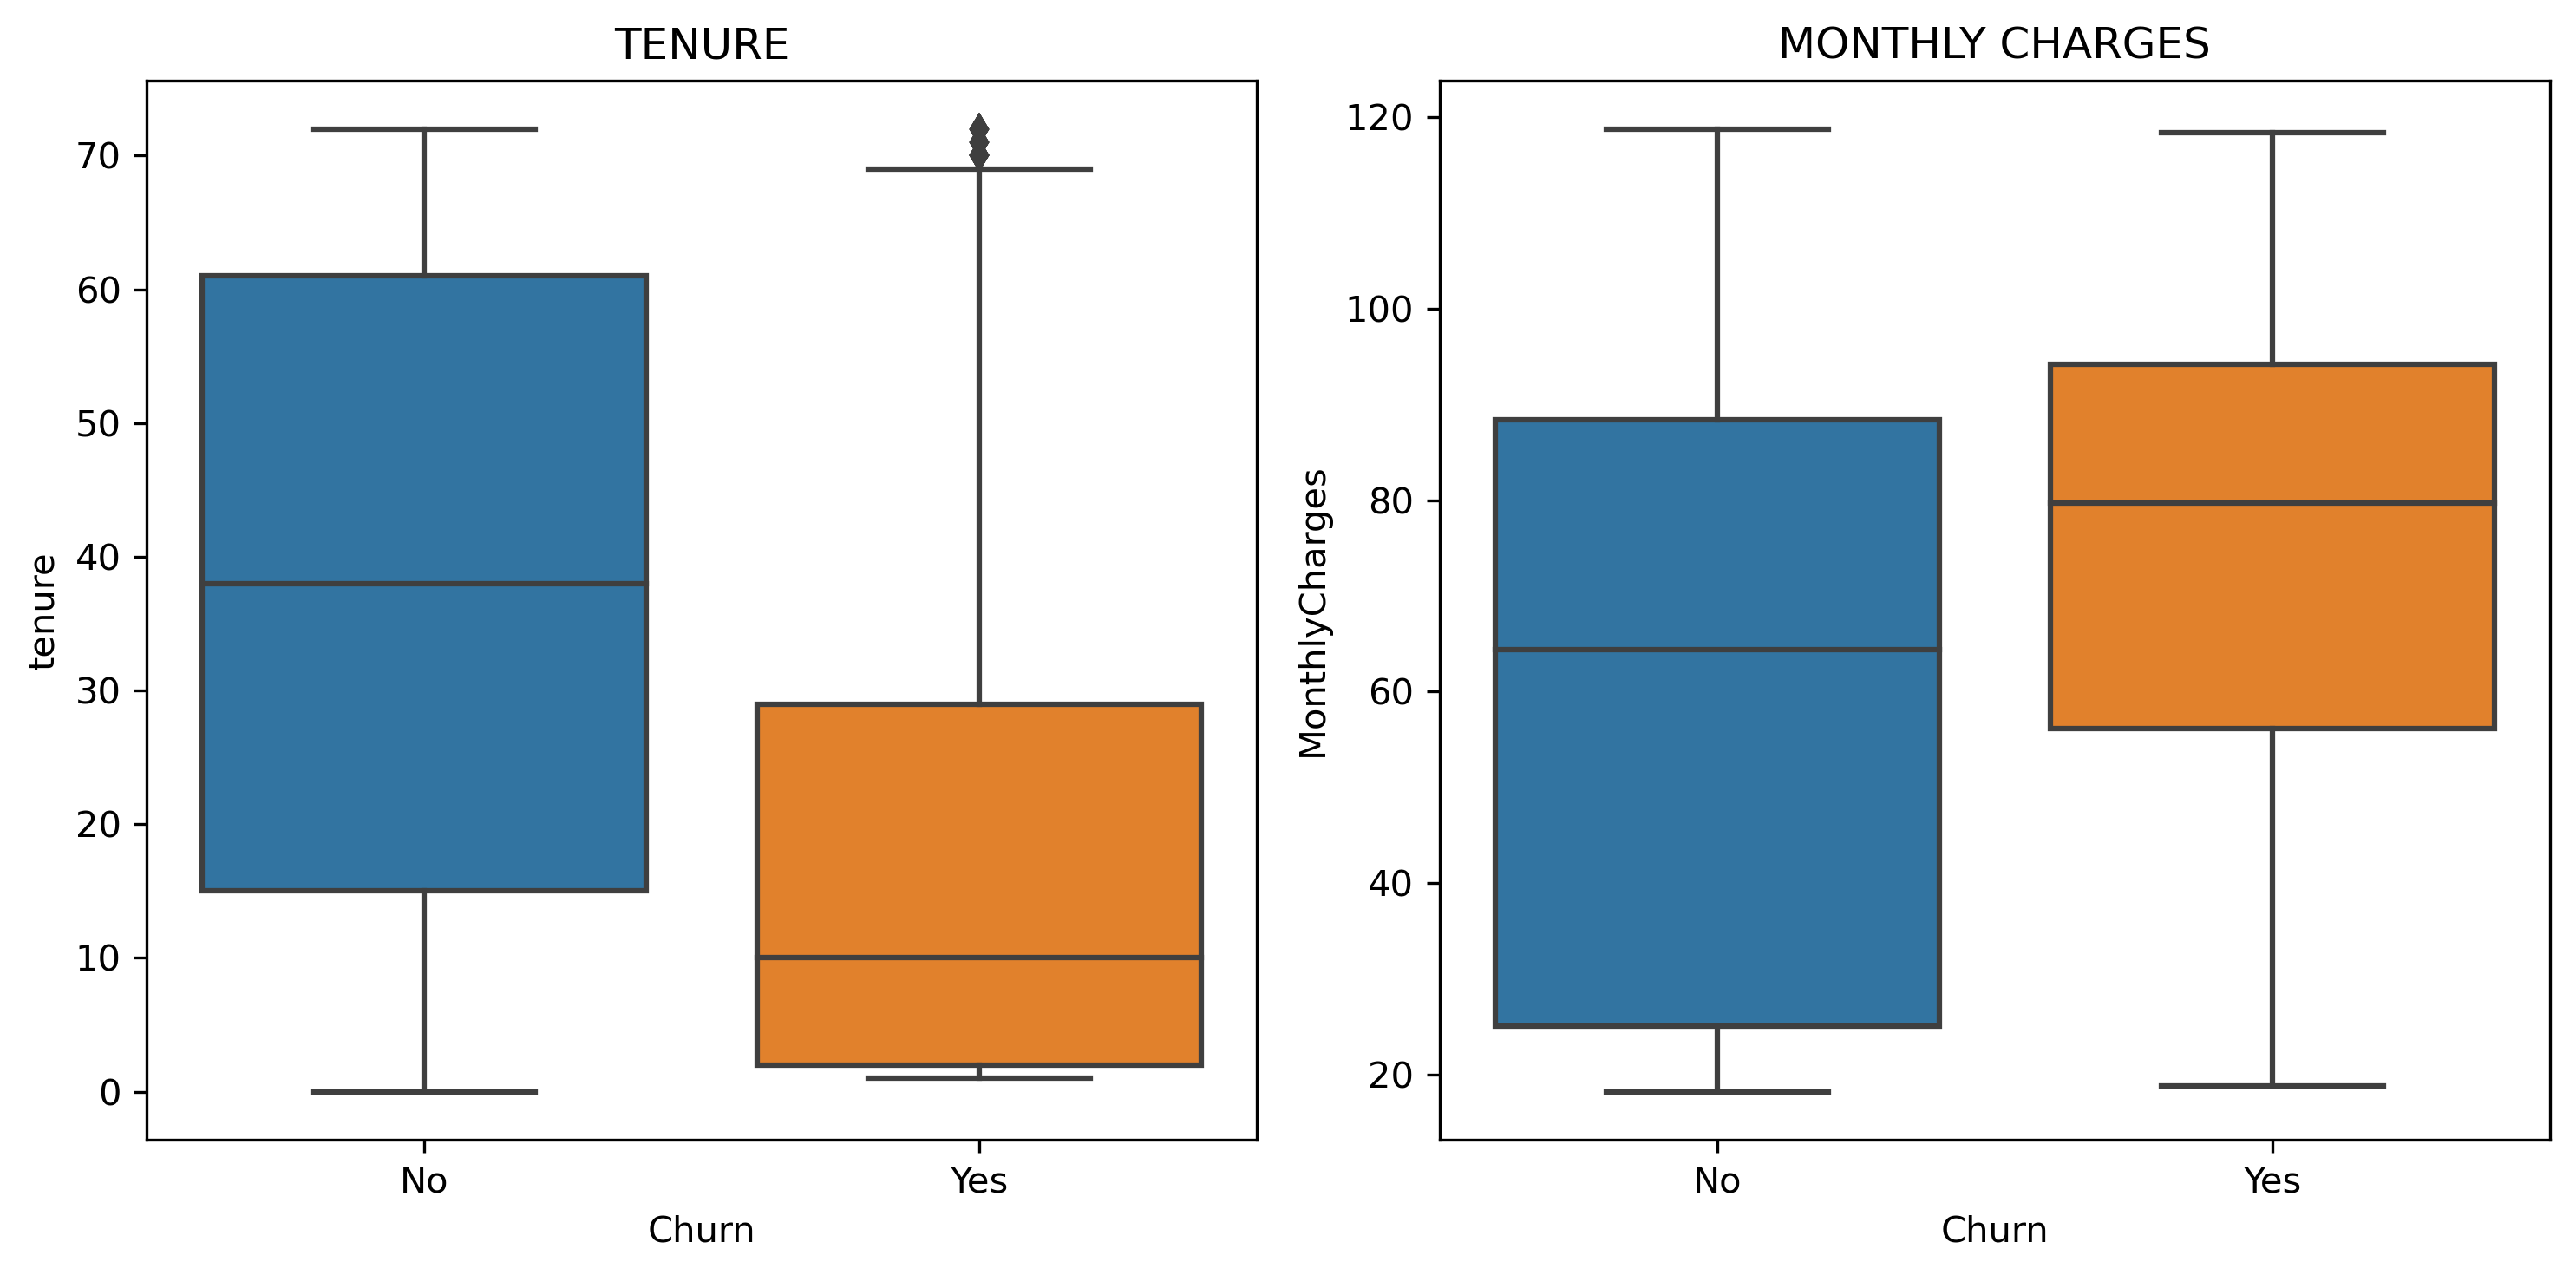

In [19]:
# Generate boxplots for tenure, MonthlyCharges.

plt.figure(figsize=(10,5),dpi=300)

plt.subplot(1,2,1)
plt.title("TENURE")
sns.boxplot(y="tenure",x="Churn", data=telecom)

plt.subplot(1,2,2)
plt.title("MONTHLY CHARGES")
sns.boxplot(y="MonthlyCharges",x="Churn", data=telecom)
plt.tight_layout()

**No outliers in numerical features detected with the IQR method — no adjustments made.**

<AxesSubplot:ylabel='Churn'>

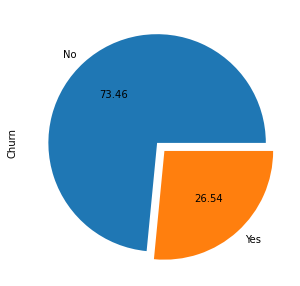

In [20]:
plt.figure(figsize=(5,5))
telecom["Churn"].value_counts().plot.pie(autopct="%.2f", explode=(0,0.1))

In [21]:
telecom["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**Data is imbalanced and it will create a problem in our model building. So data should be balance before model building.**

# DATA CLEANING

### Total Charges should be numeric amount. Let's convert it to numerical data type.

In [22]:
telecom["TotalCharges"]=pd.to_numeric(telecom["TotalCharges"],errors="coerce")

In [23]:
telecom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
telecom.loc[telecom['TotalCharges'].isnull()== True]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [25]:
telecom.dropna(axis =0, inplace=True)

In [26]:
telecom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
telecom["TotalCharges"].dtypes

dtype('float64')

### CREATING DUMMIES

In [28]:
dummies=(["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity",
          "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"])

In [29]:
telecom_final=pd.get_dummies(telecom,columns=dummies,drop_first=True)

In [30]:
telecom_final.head(1)

customerID  tenure  MonthlyCharges  TotalCharges Churn  gender_Male  \
0  7590-VHVEG       1           29.85         29.85    No            0   

   SeniorCitizen_1  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0                0            1               0                 0  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                  0                  0                     1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  

[1 rows x 32 columns]

In [31]:
telecom_final.dtypes

customerID                                object
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                     object
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No inter

### CONVERTING THE TARGET VARIABLE INTO BINARY NUMERIC VARIABLE YES=1,NO=0

In [32]:
telecom_final["Churn"]=np.where(telecom_final.Churn=="Yes",1,0)

In [33]:
telecom_final["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

### Removing the "customer ID" column.

In [34]:
telecom_final= telecom_final.drop(["customerID"], axis = 1)

<Figure size 4800x3000 with 0 Axes>

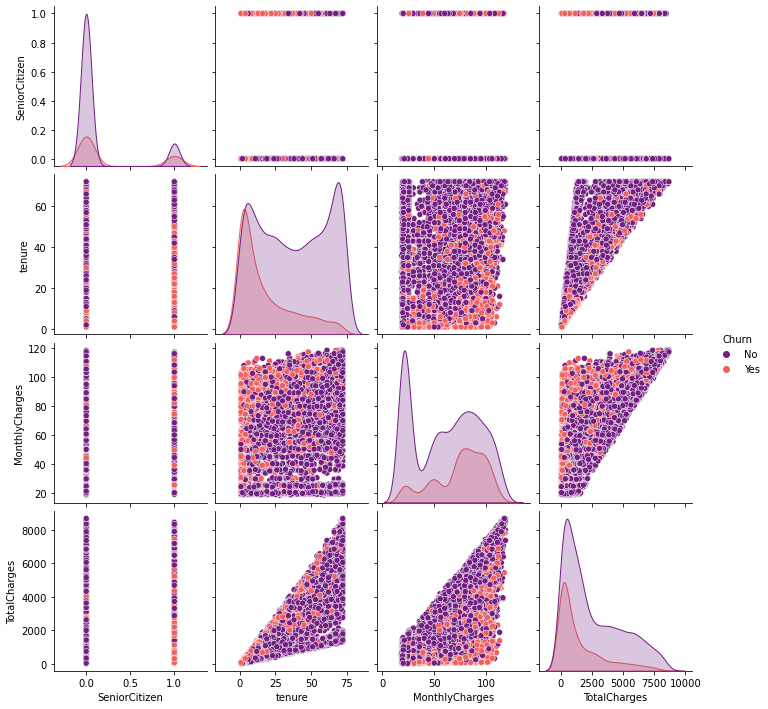

In [35]:
plt.figure(dpi=300, figsize=(16,10))
sns.pairplot(telecom,hue="Churn",palette="magma")

**Total Charges increase as Monthly Charges increase.**

## Correlation analysis

<AxesSubplot:>

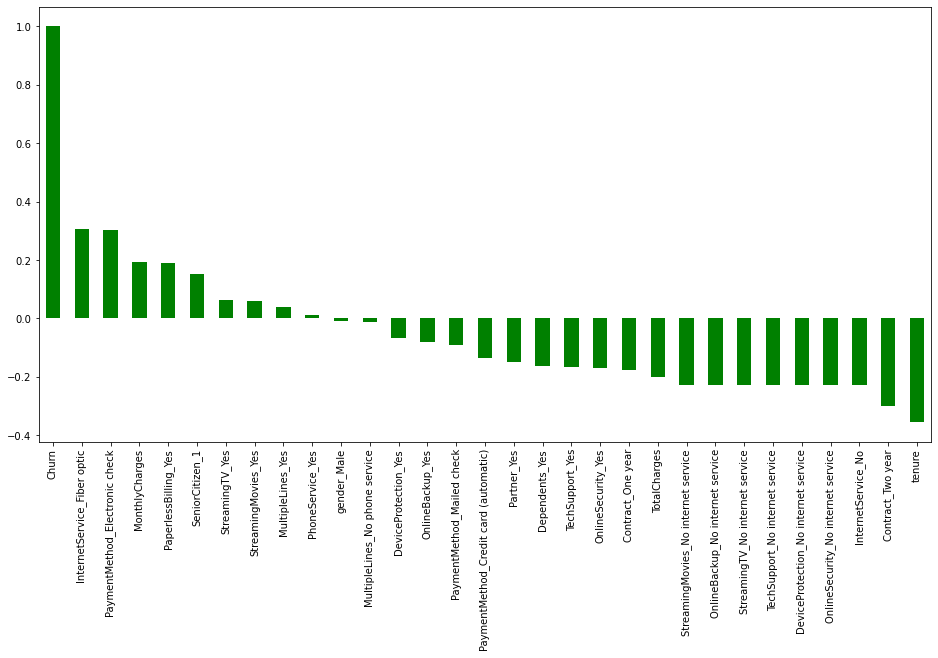

In [36]:
plt.figure(figsize=(16,8))
telecom_final.corr()["Churn"].sort_values(ascending=False).plot(kind="bar",color="green")

**HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet.**

**LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years.**

**Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn.**

**This is also evident from the Heatmap below.**

In [37]:
plt.figure(figsize=(20,20),dpi=500)
sns.heatmap(telecom_final.corr(),annot=True, cmap="magma")

<AxesSubplot:>

# MODEL BUILDING

**Spliting up our data into an X array that contains the features to train on, and a y array with the target variable.**

In [38]:
X=telecom_final.drop("Churn",axis=1)

In [39]:
y=telecom_final["Churn"]

### Train Test Split
**Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.**

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

# DATA BALANCING

In [42]:
telecom["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

### Implementing SMOTEEN for Handling Imbalanced data.

In [43]:
from imblearn.combine import SMOTEENN

In [44]:
sm = SMOTEENN()

In [45]:
X_resampled, y_resampled = sm.fit_resample(X,y)

In [46]:
print(X_resampled.shape,y_resampled.shape)

(5767, 30) (5767,)


### To check how our data is balanced after implemeneting SMOTEENN

In [47]:
from collections import Counter

In [48]:
print("Original dataset shape {}".format(Counter(y)))
print("\n")
print("Resampled dataset shape {}".format(Counter(y_resampled)))

Original dataset shape Counter({0: 5163, 1: 1869})


Resampled dataset shape Counter({1: 3139, 0: 2628})


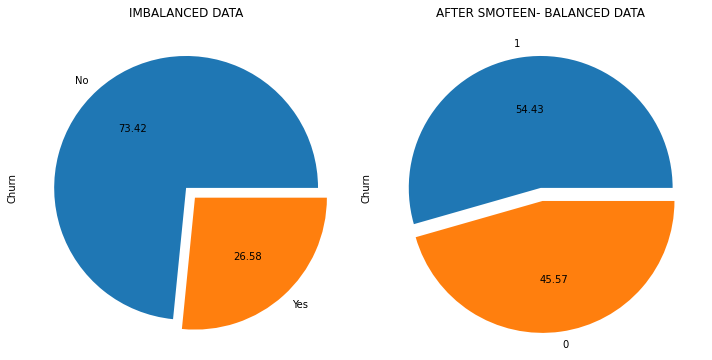

In [49]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title("IMBALANCED DATA")
telecom["Churn"].value_counts().plot.pie(autopct="%.2f", explode=(0,0.1))

plt.subplot(1,2,2)
plt.title("AFTER SMOTEEN- BALANCED DATA")
y_resampled.value_counts().plot.pie(autopct="%.2f", explode=(0,0.1))

plt.tight_layout()

### Train Test Split After Balancing the Data.

In [50]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.3,random_state=19)

**Importing libraries for classification report and a confusion matrix.**

In [51]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# LOGISTIC REGRESSION

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
log_model=LogisticRegression()

In [54]:
log_model.fit(Xr_train,yr_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
predictions=log_model.predict(Xr_test)

**Predictions and Evaluation of Logistic Regression.**

In [56]:
print(classification_report(yr_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       788
           1       0.94      0.94      0.94       943

    accuracy                           0.94      1731
   macro avg       0.94      0.94      0.94      1731
weighted avg       0.94      0.94      0.94      1731



In [57]:
print(confusion_matrix(yr_test,predictions))

[[734  54]
 [ 53 890]]


# DECISION TREE

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtree = DecisionTreeClassifier()

In [60]:
dtree.fit(Xr_train,yr_train)

DecisionTreeClassifier()

In [61]:
predictions = dtree.predict(Xr_test)

**Predictions and Evaluation of Decision Tree**

In [62]:
print(classification_report(yr_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       788
           1       0.95      0.95      0.95       943

    accuracy                           0.94      1731
   macro avg       0.94      0.94      0.94      1731
weighted avg       0.94      0.94      0.94      1731



In [63]:
print(confusion_matrix(yr_test,predictions))

[[739  49]
 [ 50 893]]


# RANDOM FOREST

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfc = RandomForestClassifier(n_estimators=600)

In [66]:
rfc.fit(Xr_train,yr_train)

RandomForestClassifier(n_estimators=600)

**Predictions and Evaluation of Random Forest.**

In [67]:
predictions = rfc.predict(Xr_test)

In [68]:
print(classification_report(yr_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       788
           1       0.95      0.97      0.96       943

    accuracy                           0.96      1731
   macro avg       0.96      0.96      0.96      1731
weighted avg       0.96      0.96      0.96      1731



In [69]:
print(confusion_matrix(yr_test,predictions))

[[744  44]
 [ 28 915]]


# SUPPORT VECTOR MACHINE

In [70]:
from sklearn.svm import SVC

In [71]:
svc_model = SVC()

In [72]:
svc_model.fit(Xr_train,yr_train)

SVC()

**Predictions and Evaluation of Support Vector Machine.**

In [73]:
predictions = svc_model.predict(Xr_test)

In [74]:
print(confusion_matrix(yr_test,predictions))

[[624 164]
 [161 782]]


In [75]:
print(classification_report(yr_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       788
           1       0.83      0.83      0.83       943

    accuracy                           0.81      1731
   macro avg       0.81      0.81      0.81      1731
weighted avg       0.81      0.81      0.81      1731



# What performed better?

**The Random Forest model performed better compared with other models. If we compare the precession and recall score of other models it can be seen that the random forest model performed better and It is evident from the confusion matrix as well.**